# Выборка и агрегация данных в MongoDB

###Цель домашней работы

Закрепить на практике основные приемы работы с СУБД MongoDB, включая выборку, сортировку, объединение, агрегацию данных и передачу результатов выборки в программу на Python в целях аналитики и дальнейшей обработки.

### Формулировка задания

В этом задании вам предстоит выполнить несколько запросов к базе данных для получения выборок по условиям, а также воспользоваться фреймворком агрегации MongoDB для построения конвейера обработки данных.

Максимальное количество баллов за выполнение домашней работы: 10.

##Что нужно использовать в работе над заданием

I. MongoDB:

1. Зарегистрируйтесь в сервисе MongoDB Atlas: https://www.mongodb.com/atlas/database.
1. Создайте кластер уровня M0 (это бесплатно).
1. Добавьте в кластер тестовую базу данных `sample_mflix`, используя опцию Load Sample Dataset.

В качестве альтернативы вы можете установить MongoDB на свой локальный компьютер и импортировать необходимые датасеты в свою СУБД, загрузив их по ссылке: https://github.com/neelabalan/mongodb-sample-dataset/tree/main/sample_mflix. Для этого подключитесь к своему серверу через Compass, создайте новую БД, создайте для каждого датасета коллекцию и щелкните «Add data» → «Import JSON or CSV file».

II. MongoDB Compass — в качестве вспомогательного инструмента для конструирования запросов и агрегаций.

III. Python и библиотека pymongo. Работа ведется в Jupyter Notebook или Google Colaboratory. Рекомендуется использовать версию Python 3.12.

##Ожидаемые результаты

Результаты работы необходимо оформить в виде ноутбука Jupyter. Можно загрузить файл в LMS либо поделиться ссылкой на Google Colaboratory.

##Место где нужно выполнить задание



In [ ]:
#Начать выполнение задания тут

In [1]:
#!pip install pymongo

import pymongo

client = pymongo.MongoClient("mongodb://localhost:27017")
print(client.list_database_names())  # Вывести список БД для проверки подключения

['admin', 'config', 'local', 'sample_mflix', 'students_db']


### Упражнение 1. Запросы на выборку

Цель этого упражнения — закрепить навык выполнения запросов на выборку. Все запросы выполняются на базе `sample_mflix` с данными о кинофильмах.

#### Задача 1.1 — **1 балл**

Выведите из коллекции `theaters` документы о кинотеатрах в городе Florence, штат KY.

Для справки:

* Обратите внимание на то, что информация об адресе кинотеатров хранится во вложенных документах. Для доступа к полям вложенных документов следует использовать точку: `родительский_документ.вложенный_документ.поле`.
* В случае затруднений с написанием логического условия обращайтесь к сопоставлению синтаксиса SQL и Mongo: https://www.mongodb.com/docs/manual/reference/sql-comparison/.
* Если вы предпочитаете сперва выполнять запросы в Compass, из этого приложения можно выгружать код готового запроса на Python (кнопка с символом `</>`).

In [2]:
# Ваш код здесь
db = client['sample_mflix']
collection = db['theaters']

cur = collection.find(
    {"location.address.city": "Florence", 
    "location.address.state": "KY"}
)

list(cur)

[{'_id': ObjectId('59a47287cfa9a3a73e51e893'),
  'theaterId': 161,
  'location': {'address': {'street1': '100 Meijer Dr.',
    'city': 'Florence',
    'state': 'KY',
    'zipcode': '41042'},
   'geo': {'type': 'Point', 'coordinates': [-84.636383, 39.014843]}}},
 {'_id': ObjectId('59a47287cfa9a3a73e51ea02'),
  'theaterId': 2823,
  'location': {'address': {'street1': '2823 Florence Mall',
    'street2': '#2148',
    'city': 'Florence',
    'state': 'KY',
    'zipcode': '41042'},
   'geo': {'type': 'Point', 'coordinates': [-84.6499595, 38.9967246]}}}]

#### Задача 1.2 — **1 балл**

Сделав запрос к коллекции `comments`, выведите _один_ комментарий (значение поля `text`) пользователя по имени Doreah.

In [3]:
# Ваш код здесь
cur = db["comments"].find(
    {"name": "Doreah"}
).limit(1)

list(cur)

[{'_id': ObjectId('5a9427648b0beebeb6957b18'),
  'name': 'Doreah',
  'email': 'roxanne_mckee@gameofthron.es',
  'movie_id': ObjectId('573a1391f29313caabcd7915'),
  'text': 'Porro explicabo cumque vitae sint quia quis. Consequuntur voluptatibus optio maxime ratione temporibus incidunt minus architecto.',
  'date': datetime.datetime(1983, 9, 13, 3, 38, 23)}]

#### Задача 1.3 — **1 балл**

Сделав запрос к коллекции `movies`, выведите количество документов, в которых в качестве первого жанра фильма (поле `genres`) указано значение «Horror».

Для справки:

1. Обратите внимание, что поле `genres` представляет собой массив (индексация массивов начинается с нуля).
1. При работе в MongoDB Shell для подсчета количества документов в курсоре можно использовать метод `count()`, однако он был удален в последних версиях библиотеки pymongo. В случае затруднений с использованием функций Mongo можно использовать для подсчета документов средства Python.

In [4]:
# Ваш код здесь
cur = db["movies"].count_documents(
    {"genres.0": "Horror"}
)

print(cur)

814


#### Задача 1.4 — **2 балла**

Выведите из коллекции `movies` документы о фильмах, которые в качестве первого жанра определены как «Film-Noir» либо «Horror» и были выпущены в период с 1940 по 1949 гг. (включительно).

In [13]:
# Ваш код здесь
from datetime import datetime
from datetime import timezone

cur = db["movies"].count_documents(
    {
    '$or': [
        {
            'genres.0': 'Horror'
        }, {
            'genres.0': 'Film-Noir'
        }
    ], 
    'released': {
        '$gte': datetime(1939, 12, 31, 21, 0, 0, tzinfo=timezone.utc), 
        '$lte': datetime(1949, 12, 31, 21, 0, 0, tzinfo=timezone.utc)
    }
}
)

print(cur)

8


#### Задача 1.5 — **1 балл**

Модифицируйте запрос из задачи 1.4 таким образом, чтобы осуществить _проекцию_: результатом выборки должен стать список словарей, каждый из которых содержит только два поля: `title` и `year`.

Для справки о проекции см. документацию по методу `find()` в pymongo:
https://pymongo.readthedocs.io/en/stable/api/pymongo/collection.html#pymongo.collection.Collection.find

In [ ]:
# Ваш код здесь
# Ваш код здесь


cur = db["movies"].find(
    filter= {
    '$or': [
        {
            'genres.0': 'Horror'
        }, {
            'genres.0': 'Film-Noir'
        }
    ], 
    'released': {
        '$gte': datetime(1939, 12, 31, 21, 0, 0, tzinfo=timezone.utc), 
        '$lte': datetime(1949, 12, 31, 21, 0, 0, tzinfo=timezone.utc)
    }
}, projection={"title": 1, "year": 1, "_id": False}
)

list(cur)

[{'title': 'Cat People', 'year': 1942},
 {'title': 'I Walked with a Zombie', 'year': 1943},
 {'title': 'The Leopard Man', 'year': 1943},
 {'title': 'Dead of Night', 'year': 1945},
 {'title': 'Spellbound', 'year': 1945},
 {'title': 'The Chase', 'year': 1946},
 {'title': 'The Set-Up', 'year': 1949},
 {'title': 'The Third Man', 'year': 1949}]

### Упражнение 2. Конвейер агрегации

#### Задача 2.1 — **3 балла**

В рамках этой задачи требуется узнать, какие фильмы получили наибольшее число комментариев. Составьте для этого конвейер агрегации с перечисленными ниже этапами. Для удобства рекомендуется воспользоваться приложением Compass.

1. Сгруппировать документы коллекции `comments` по полю `movie_id` и подсчитать количество комментариев для каждого фильма, записав его в поле `count`.
1. Отсортировать получившийся набор данных по убыванию количества комментариев (так чтобы первый документ в этом наборе указывал на фильм с наибольшим количеством комментариев).
1. Используя оператор `$lookup`, присоединить коллекцию `movies` (по полю `movie_id`).
1. Выполнить проекцию, оставив в наборе данных только три поля: название фильма (`title`), год выпуска (`year`) и количество комментариев (поле `count`, добавленное на первом этапе). Для этого воспользуйтесь оператором `$project`: https://www.mongodb.com/docs/manual/reference/operator/aggregation/project/. Обратите внимание, что данные из коллекции `movies` (`title` и `year`) на этом этапе окажутся внутри массива.
1. Применить оператор `$unwind`, чтобы деконструировать этот массив. См. https://www.mongodb.com/docs/manual/reference/operator/aggregation/unwind/. В результате массив должен превратиться в одиночный объект.
1. Применить оператор `$addFields`, чтобы добавить поля `title` и `year` на вернхий уровень структуры документа. См. https://www.mongodb.com/docs/manual/reference/operator/aggregation/addFields/.
1. Еще раз выполнить проекцию, чтобы удалить поле с массивом.

Ваш алгоритм решения может отличаться от приведенного здесь. Главное — достичь цели: получить плоский набор данных с тремя полями (`count` — количество комментариев, `year` — год выпуска, `title` — название фильма).

Скопируйте полученный конвейер в этот документ в виде кода на Python и выведите его на экран в виде списка словарей.

In [35]:
# Ваш код здесь
cursor = db['comments'].aggregate(
    
[
    {
        '$group': {
            '_id': '$movie_id', 
            'count': {
                '$count': {}
            }
        }
    }, {
        '$sort': {
            'count': -1
        }
    }, {
        '$lookup': {
            'from': 'movies', 
            'localField': '_id', 
            'foreignField': '_id', 
            'as': 'movie_info'
        }
    }, {
        '$project': {
            'movie_info.title': 1, 
            'movie_info.year': 1, 
            'count': 1
        }
    }, {
        '$unwind': {
            'path': '$movie_info'
        }
    }, {
        '$addFields': {
            'title': '$movie_info.title', 
            'year': '$movie_info.year'
        }
    }, {
        '$project': {
            'title': 1, 
            'year': 1, 
            'count': 1
        }
    }
]
)

list_cursor = list(cursor)
list_cursor

[{'_id': ObjectId('573a13bff29313caabd5e91e'),
  'count': 161,
  'title': 'The Taking of Pelham 1 2 3',
  'year': 2009},
 {'_id': ObjectId('573a13b3f29313caabd3b647'),
  'count': 158,
  'title': 'Terminator Salvation',
  'year': 2009},
 {'_id': ObjectId('573a13a5f29313caabd159a9'),
  'count': 158,
  'title': 'About a Boy',
  'year': 2002},
 {'_id': ObjectId('573a13a3f29313caabd0d1e3'),
  'count': 158,
  'title': "Ocean's Eleven",
  'year': 2001},
 {'_id': ObjectId('573a13abf29313caabd25582'),
  'count': 158,
  'title': '50 First Dates',
  'year': 2004},
 {'_id': ObjectId('573a139bf29313caabcf3a45'),
  'count': 157,
  'title': 'The Mummy',
  'year': 1999},
 {'_id': ObjectId('573a13bcf29313caabd57db6'),
  'count': 157,
  'title': 'Sherlock Holmes',
  'year': 2009},
 {'_id': ObjectId('573a13b0f29313caabd3505e'),
  'count': 155,
  'title': 'Hellboy II: The Golden Army',
  'year': 2008},
 {'_id': ObjectId('573a13a0f29313caabd05ae1'),
  'count': 154,
  'title': 'The Mummy Returns',
  'year':

#### Задача 2.2 — **1 балл**

Используя данные, полученные в задаче 2.1, выведите на экран столбчатую диаграмму, показывающую топ-20 наиболее комментируемых фильмов. По оси ординат выведите названия этих фильмов (подписи разместите слева диаграммы), по оси абсцисс — количество комментариев.

Для решения задачи можно использовать любую библиотеку, например Seaborn или Matplotlib.

<Axes: xlabel='count', ylabel='title'>

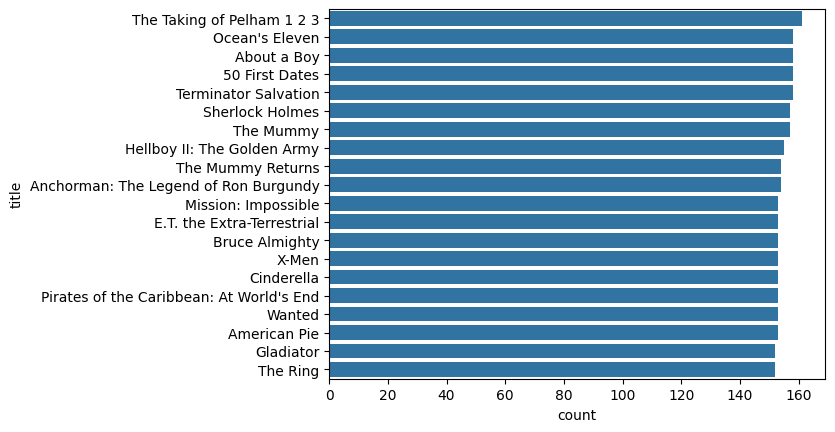

In [34]:
# Ваш код здесь
import pandas as pd
import seaborn as sns



df = pd.DataFrame(list_cursor)

sns.barplot(df[:20], x='count', y='title')